# Heart Disease Prediction Project

This project aims to predict the presence of heart disease using machine learning techniques. The workflow includes data preprocessing, dimensionality reduction, model training, hyperparameter tuning, evaluation, and model persistence. The project compares the performance of Logistic Regression and Decision Tree classifiers, and demonstrates the use of PCA for feature reduction and outlier handling for robust modeling.

## Technologies Used
- **Python**: Core programming language for data analysis and modeling
- **Pandas, NumPy**: Data manipulation and numerical operations
- **Matplotlib, Seaborn**: Data visualization
- **scikit-learn**: Machine learning library for preprocessing, modeling, evaluation, and hyperparameter tuning
- **Pickle**: Model serialization
- **Streamlit**: For building interactive web applications (installation included)

## Key Steps
- Data loading and exploration
- Outlier handling and feature scaling
- Dimensionality reduction using PCA
- Model training (Logistic Regression, Decision Tree)
- Hyperparameter tuning with GridSearchCV
- Model evaluation and comparison
- Model and pipeline serialization for deployment

Choose the incorrect option about ephemeral content.

(i) Instagram Stories are a type of ephemeral content.
(ii) Ephemeral content helps in generating more user-generated  content.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import pickle


ModuleNotFoundError: No module named 'matplotlib'

In [3]:
## Analysing the Data Set
heart_df = pd.read_csv('heart.csv')


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1    sex       1025 non-null   int64  
 2    cp        1025 non-null   int64  
 3    trestbps  1025 non-null   int64  
 4    chol      1025 non-null   int64  
 5    fbs       1025 non-null   int64  
 6    restecg   1025 non-null   int64  
 7    thalach   1025 non-null   int64  
 8    exang     1025 non-null   int64  
 9    oldpeak   1025 non-null   float64
 10   slope     1025 non-null   int64  
 11   ca        1025 non-null   int64  
 12   thal      1025 non-null   int64  
 13   target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


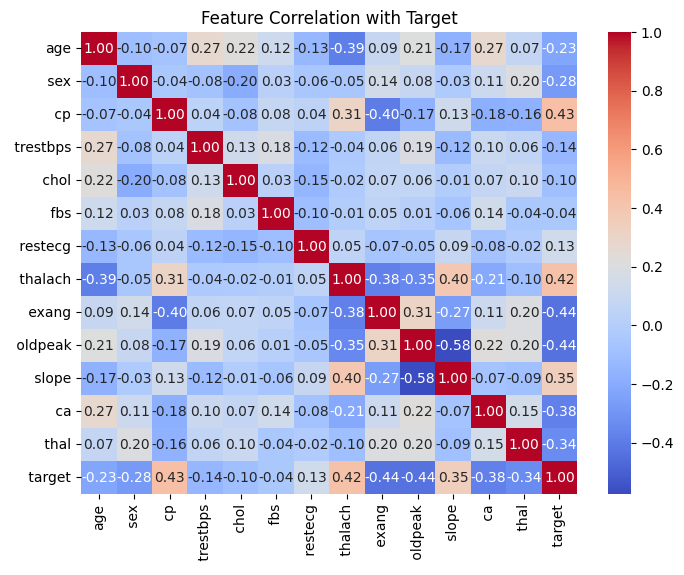

In [5]:
# Correlation heatmap for features and target
corr_matrix = heart_df.corr()
plt.figure(figsize=(8,6))
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Target')
plt.show()

In [6]:
# there are more than 2 highly correlated features so Iam using PCA to reduce the dimensionality. although it improves the model performance

pca = PCA(n_components=2)


In [7]:
heart_df.columns = heart_df.columns.str.strip(' ')

In [8]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.apply(lambda x: upper if x > upper else lower if x < lower else x)

In [9]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
X = heart_df.drop('target',axis=1)
y = heart_df['target']
# handling outliers
X = X.apply(cap_outliers)
#scalling 
scaler = StandardScaler()
X_scales = scaler.fit_transform(X)
# Impute missing values after scaling
imputer = SimpleImputer(strategy='mean')
X_scales = imputer.fit_transform(X_scales)
# implementing PCA
X_pca = pca.fit_transform(X_scales)

In [11]:
X_pca
print("explaination...")
print(pca.explained_variance_ratio_)

explaination...
[0.23415946 0.12484415]


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
# first model logistic regressor

lgr = LogisticRegression(random_state=45,verbose=1)
model2 = lgr.fit(X_train,y_train) #training

#predicting
y_pred = lgr.predict(X_test)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [14]:
y_pred = lgr.predict(X_test)

In [27]:
print(y_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0]


In [ ]:
# ----------------------------- Metrics -----------------------------------------------------------------------
log_acc = accuracy_score(y_test,y_pred)
log_prec = precision_score(y_test,y_pred)

print(f"Logistic regression analysis ={log_acc}\nprecision = {log_prec}")

Logistic regression analysis =0.7804878048780488
precision = 0.75


In [16]:
#using grid-search CV for hyperParameter tuning
parameters = {
    'random_state': [45],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=parameters,
    scoring={'accuracy': 'accuracy', 'precision': 'precision'},
    n_jobs=-1,
    verbose=1,
    refit='accuracy'
)
res = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [17]:
print('Using grid-search cv for hyper parameter tuning')
print(res.best_estimator_)
print(res.best_params_)
print(res.best_score_)

Using grid-search cv for hyper parameter tuning
DecisionTreeClassifier(max_depth=7, random_state=45)
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 45}
0.9097560975609756


In [29]:
decisionTree = DecisionTreeClassifier(
    random_state=45,
    max_depth=7,           # Limit the depth of the tree
    min_samples_split=2,  # Require at least 10 samples to split a node
    min_samples_leaf=1     # Require at least 5 samples at a leaf node
)
model = decisionTree.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
print('Using grid-search cv for hyper parameter tuning')
print(res.best_estimator_)
print(res.best_params_)
print(res.best_score_)

Using grid-search cv for hyper parameter tuning
DecisionTreeClassifier(max_depth=7, random_state=45)
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 45}
0.9097560975609756


In [31]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
prec2 = precision_score(y_true=y_test, y_pred=y_pred, average='binary')

In [32]:
print(f"Descision tree analysis\nAcc = {acc}\nprecision = {prec2}")

Descision tree analysis
Acc = 0.8975609756097561
precision = 0.8416666666666667


In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(
    model,
    feature_names=X_train,
    class_names=[str(cls) for cls in model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# Feature importance visualization
importances = model.feature_importances_
features = X_train
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title('Feature Importances (Decision Tree)')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

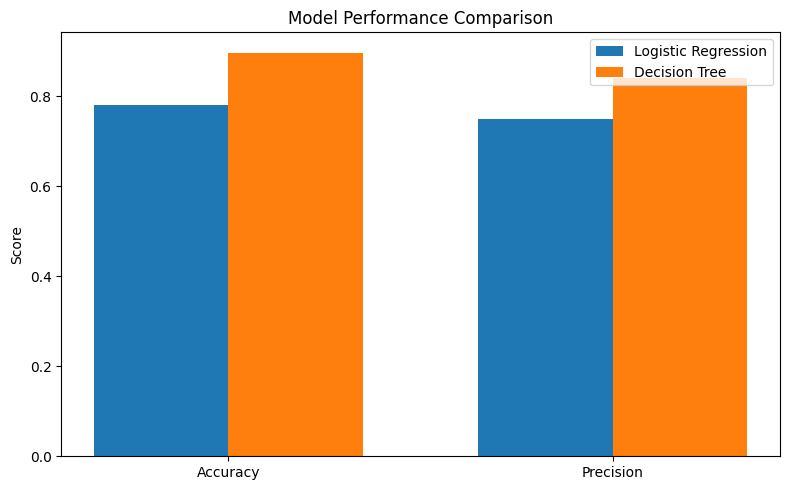

In [34]:
# Model performance comparison: Bar chart
metrics = ['Accuracy', 'Precision']
logistic_scores = [log_acc, log_prec]
tree_scores = [acc, prec2]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, logistic_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, tree_scores, width, label='Decision Tree')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Generating Synthetic Data for Validation
np.random.seed(42)
num_samples = 20
validation_data = {}
for col in heart_df.columns:
    if col == 'target':
        # Random binary targets
        validation_data[col] = np.random.randint(0, 2, size=num_samples)
    else:
        # Random values within the min/max of each feature
        col_min = heart_df[col].min()
        col_max = heart_df[col].max()
        validation_data[col] = np.random.uniform(col_min, col_max, size=num_samples)

valid = pd.DataFrame(validation_data)
valid = valid.reindex(columns=heart_df.columns)

In [36]:
# Preprocess validation data using the same scaler and PCA as training data
valid_features = valid.drop('target', axis=1)
valid_features = valid_features.apply(cap_outliers)
valid_features_scaled = scaler.transform(valid_features)
# Impute missing values in validation data using the same imputer
valid_features_scaled = imputer.transform(valid_features_scaled)
valid_features_pca = pca.transform(valid_features_scaled)
valid_pred = model.predict(valid_features_pca)
print('accuracy = ', accuracy_score(valid['target'].values, valid_pred))
print('Predictions:', valid_pred)
print('True labels:', valid['target'].values)

accuracy =  0.5
Predictions: [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1]
True labels: [1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1]


In [37]:
#saving the model,imputer,and pca data

with open('decision_treeModel.pkl','wb') as m:
    pickle.dump(model,m)
    print('dumping complete')

with open('imputer_.pkl','wb') as m:
    pickle.dump(imputer,m)
    print('imputer dumping complete')

with open('scaler_.pkl','wb') as m:
    pickle.dump(scaler,m)
    print('imputer dumping complete')

with open('pca.pkl','wb') as m:
    pickle.dump(pca,m)
    print('pca dumping complete')

dumping complete
imputer dumping complete
imputer dumping complete
pca dumping complete


In [38]:
### using strimlit ------
! pip install streamlit